In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

nohitter_times = np.array([843, 1613, 1101,  215,  684,  814,  278,  324,  161,  219,  545,
        715,  966,  624,   29,  450,  107,   20,   91, 1325,  124, 1468,
        104, 1309,  429,   62, 1878, 1104,  123,  251,   93,  188,  983,
        166,   96,  702,   23,  524,   26,  299,   59,   39,   12,    2,
        308, 1114,  813,  887,  645, 2088,   42, 2090,   11,  886, 1665,
       1084, 2900, 2432,  750, 4021, 1070, 1765, 1322,   26,  548, 1525,
         77, 2181, 2752,  127, 2147,  211,   41, 1575,  151,  479,  697,
        557, 2267,  542,  392,   73,  603,  233,  255,  528,  397, 1529,
       1023, 1194,  462,  583,   37,  943,  996,  480, 1497,  717,  224,
        219, 1531,  498,   44,  288,  267,  600,   52,  269, 1086,  386,
        176, 2199,  216,   54,  675, 1243,  463,  650,  171,  327,  110,
        774,  509,    8,  197,  136,   12, 1124,   64,  380,  811,  232,
        192,  731,  715,  226,  605,  539, 1491,  323,  240,  179,  702,
        156,   82, 1397,  354,  778,  603, 1001,  385,  986,  203,  149,
        576,  445,  180, 1403,  252,  675, 1351, 2983, 1568,   45,  899,
       3260, 1025,   31,  100, 2055, 4043,   79,  238, 3931, 2351,  595,
        110,  215,    0,  563,  206,  660,  242,  577,  179,  157,  192,
        192, 1848,  792, 1693,   55,  388,  225, 1134, 1172, 1555,   31,
       1582, 1044,  378, 1687, 2915,  280,  765, 2819,  511, 1521,  745,
       2491,  580, 2072, 6450,  578,  745, 1075, 1103, 1549, 1520,  138,
       1202,  296,  277,  351,  391,  950,  459,   62, 1056, 1128,  139,
        420,   87,   71,  814,  603, 1349,  162, 1027,  783,  326,  101,
        876,  381,  905,  156,  419,  239,  119,  129,  467])
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

# 1. Optimal parameters
After completing the prequel to this course, you are now beginning to think probabilistically. Outcomes of measurements follow probability distributions defined by the story of how the data came to be. When we looked at Michelson's speed of light in air measurements, we assumed that the results were Normally distributed.

2. Histogram of Michelson's measurements
We verified that both by looking at the PDF and

1 Data: Michelson, 1880
3. CDF of Michelson's measurements
the CDF, which was more effective because there is no binning bias. To compute and plot the CDF, we needed our old friends

1 Data: Michelson, 1880
4. Checking Normality of Michelson data
NumPy and matplotlib dot pyplot, so the first step was to import them with their traditional aliases. To compute the theoretical CDF by sampling, we passed two parameters into np dot random dot normal, the mean and standard deviation. The values we chose for these parameters were in fact the mean and standard deviation we calculated directly from the data.

5. CDF of Michelson's measurements
The result was that the theoretical CDF overlayed beautifully with the empirical CDF. How did we know that the mean and standard deviation calculated from the data were the appropriate values for the Normal parameters? We could have chosen others.

1 Data: Michelson, 1880
6. CDF with bad estimate of st. dev.
What if the standard deviation differs by 50%? The CDFs no longer match. Or if the mean

1 Data: Michelson, 1880
7. CDF with bad estimate of mean
varies by just point-01%. So, if we believe that the process that generates our data gives Normally distributed results,

1 Data: Michelson, 1880
8. Optimal parameters
the set of parameters that brings the model, in this case a Normal distribution, in closest agreement with the data uses the mean and standard deviation computed directly from the data. These are the optimal parameters. Remember though, the parameters are only optimal for

9. Mass of MA large mouth bass
the model you chose for your data. When your model is wrong, the optimal parameters are not really meaningful. Finding the optimal parameters is not always as easy as just computing the mean and standard deviation from the data. We will encounter this later in this chapter when we do linear regressions and we rely on built-in NumPy functions to find the optimal parameters for us. I pause to note that

1 Source: Mass. Dept. of Environmental Protection
10. Packages to do statistical inference
there are great tools in the Python ecosystem for doing statistical inference, including by optimization, scipy dot stats and

11. Packages to do statistical inference
statsmodels being two good examples. In this course, however,

12. Packages to do statistical inference
we focus on hacker statistics because the technique is like a Swiss Army knife; the same simple principle is applicable to a wide variety of statistical problems.

1 Knife image: D-M Commons, CC BY-SA 3.0
13. Let's practice!
Now it's time for you to do some exercises to demonstrate how choosing optimal parameters results in best agreement between the theoretical model distribution and your data

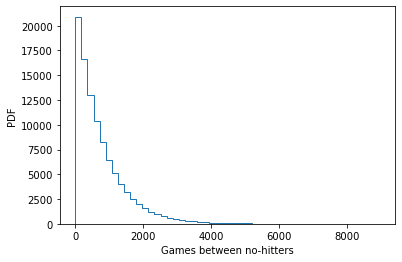

In [5]:
# Seed random number generator
np.random.seed(42)

# Compute mean no-hitter time: tau
tau = np.mean(nohitter_times)

# Draw out of an exponential distribution with parameter tau: inter_nohitter_time
inter_nohitter_time = np.random.exponential(tau, 100000)

# Plot the PDF and label axes
_ = plt.hist(inter_nohitter_time,
             bins=50, histtype='step')
_ = plt.xlabel('Games between no-hitters')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

# Do the data follow our story?

You have modeled no-hitters using an Exponential distribution. Create an ECDF of the real data. Overlay the theoretical CDF with the ECDF from the data. This helps you to verify that the Exponential distribution describes the observed data.

It may be helpful to remind yourself of the function you created in the previous course to compute the ECDF, as well as the code you wrote to plot it.


Compute an ECDF from the actual time between no-hitters (`nohitter_times`). Use the `ecdf()` function you wrote in the prequel course.
Create a CDF from the theoretical samples you took in the last exercise (`inter_nohitter_time`).
Plot `x_theor` and `y_theor` as a line using `plt.plot()`. Then overlay the ECDF of the real data `x` and `y` as points. To do this, you have to specify the keyword arguments `marker = '.'` and `linestyle = 'none'` in addition to `x` and `y` inside `plt.plot()`.

Set a 2% margin on the plot.

Show the plot.



To compute the ECDF of `nohitter_times`, pass it as an argument to the `ecdf()` function.
To create the CDF from the theoretical samples, use the `ecdf()` function once again, passing in the array of the samples you took in the previous exercise (`inter_nohitter_time`).
To plot the CDF as a line, pass in `x_theor` and `y_theor` as arguments to `plt.plot()`. To overlay the real data as points, use `plt.plot()` with the arguments `x`, `y`, `marker = '.'` and `linestyle = 'none'`.
You can set margins by passing in the desired margin as an argument to `plt.margins()`.
To display the plot, use `plt.show()`

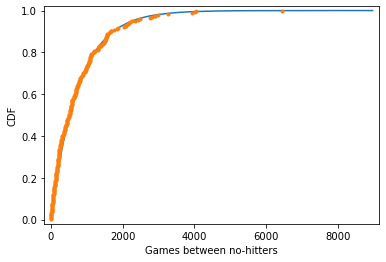

In [6]:
# Create an ECDF from real data: x, y
x, y = ecdf(nohitter_times)

# Create a CDF from theoretical samples: x_theor, y_theor
x_theor, y_theor = ecdf(inter_nohitter_time)

# Overlay the plots
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')

# Margins and axis labels
plt.margins(.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Show the plot
plt.show()

# How is this parameter optimal?

Now sample out of an exponential distribution with  being twice as large as the optimal . Do it again for  half as large. Make CDFs of these samples and overlay them with your data. You can see that they do not reproduce the data as well. Thus, the  you computed from the mean inter-no-hitter times is optimal in that it best reproduces the data.

Note: In this and all subsequent exercises, the random number generator is pre-seeded for you to save you some typing.



Take 10000 samples out of an Exponential distribution with parameter  = tau/2.

Take 10000 samples out of an Exponential distribution with parameter  = 2*tau.

Generate CDFs from these two sets of samples using your ecdf() function.

Add these two CDFs as lines to your plot. This has been done for you, so hit submit to view the plot!

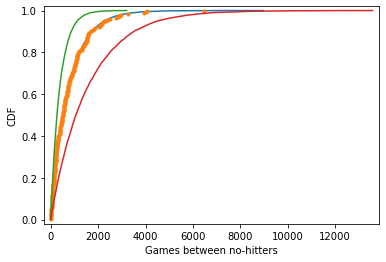

In [8]:
# Plot the theoretical CDFs
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Take samples with half tau: samples_half
samples_half = np.random.exponential(tau/2, 10000)

# Take samples with double tau: samples_double
samples_double = np.random.exponential(2*tau,10000)

# Generate CDFs from these samples
x_half, y_half = ecdf(samples_half)
x_double, y_double = ecdf(samples_double)

# Plot these CDFs as lines
_ = plt.plot(x_half, y_half)
_ = plt.plot(x_double, y_double)

# Show the plot
plt.show()

# 1. Linear regression by least squares
Sometimes two variables are related. You may recall from the prequel to this course that we computed the Pearson correlation coefficient between

2. 2008 US swing state election results
Obama's vote share in each county in swings states and the total vote count of the respective counties. The Pearson correlation coefficient is important to compute, but we might like to get a fuller understanding of how the data are related to each other. Specifically, we might suspect some underlying function gives the data its shape.

1 Data retrieved from Data.gov (https://www.data.gov/)
3. 2008 US swing state election results
Often times a linear function is appropriate to describe the data, and this is what we will focus on in this course. The parameters of the function are

1 Data retrieved from Data.gov (https://www.data.gov/)
4. 2008 US swing state election results
the slope and intercept. The slope sets how steep the line is, and the intercept sets where the line crosses the y-axis. How do we figure out which slope and intercept best describe the data? A simple answer is that we want to choose the slope and intercept such that the data points collectively lie as close as possible to the line. This is easiest to think about by first considering one data point,

1 Data retrieved from Data.gov (https://www.data.gov/)
5. 2008 US swing state election results
say this one. The vertical distance between the data point and the line is called

1 Data retrieved from Data.gov (https://www.data.gov/)
6. Residuals
the residual. In this case, the residual has a negative value because the data point lies below the line. Each data point has a residual associated with it.

1 Data retrieved from Data.gov (https://www.data.gov/)
7. Least squares
We define the line that is closest to the data to be the line for which the sum of the squares of all of the residuals is minimal. This process, finding the parameters for which the sum of the squares of the residuals is minimal, is called "least squares". There are many algorithms to do this in practice.

8. Least squares with np.polyfit()
We will use the NumPy function polyfit, which performs least squares analysis with polynomial functions. We can use it because a linear function is a first degree polynomial. The first two arguments to this function are the x and y data. The third argument is the degree of the polynomial you wish to fit; for linear functions, we enter one. The function returns the slope and intercept of the best fit line. The slope tells us that we get about 4 more percent votes for Obama for every 100,000 additional voters in a county. Now that you know how to perform a linear regression,

9. Let's practice!
let's do it with some real data in the exercises!